In [1]:
# A 'magic' command to display plots inline
%matplotlib inline

import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [2]:
# Create the connection
conn = sqlite3.connect(os.getcwd() + '/data/slr.db')

In [3]:
sources = pd.read_sql_query("select * from source;", conn)
stations = pd.read_sql_query("select * from station;", conn)

In [4]:
sources

,id,station,name,checksum
0,1,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,None
1,2,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,None
2,3,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,None
3,4,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,None
4,5,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,None
5,6,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,None
6,7,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,None
7,8,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,None
8,9,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,None
9,10,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,None


In [5]:
stations

,id,name,shortname
0,9410230,La Jolla,lj
1,9410660,Los Angeles,la
2,9411340,Santa Barbara,sb
3,9412110,Port San Luis,sl
4,9413450,Monterey,mt
5,9414290,San Francisco,sf
6,9415020,Point Reyes,pr
7,9416841,Point Arena,pa
8,9419750,Crescent City,cc


In [286]:
sf_sources = pd.read_sql_query('SELECT source.id, source.station, source.name AS series, station.name FROM source JOIN station ON source.station = station.id WHERE station.shortname = "cc";', conn)
sf_sources

,id,station,series,name
0,1,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,Crescent City
1,2,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,Crescent City
2,3,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,Crescent City
3,4,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,Crescent City
4,5,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,Crescent City
5,6,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,Crescent City
6,7,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,Crescent City
7,8,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,Crescent City
8,9,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,Crescent City
9,10,9419750,/media/data/gis/projects/caladapt/vector/slr/c...,Crescent City


In [287]:
def get_series_name(x):
    model = x['series'].split('.')[3]
    scenario = x['series'].split('.')[1]
    perc = x['series'].split('.')[4]
    percentile = ''
    if (perc == 'prec500'):
        percentile = '50th Percentile'
    elif (perc == 'prec950'):
        percentile = '95th Percentile'
    else:
        percentile = '99.9 Percentile'
    return model + ' ' + scenario + ' ' + percentile
###
#['/media/data/gis/projects/caladapt/vector/slr/sf/HourlySL',
# 'RCP45',
# 'sf',
# 'HadGEM2-ES',
# 'prec500',
# 'txt']
###

In [288]:
sf_sources['series'] = sf_sources.apply(get_series_name, axis=1)
sf_sources

,id,station,series,name
0,1,9419750,HadGEM2-ES RCP45 50th Percentile,Crescent City
1,2,9419750,HadGEM2-ES RCP45 95th Percentile,Crescent City
2,3,9419750,HadGEM2-ES RCP45 99.9 Percentile,Crescent City
3,4,9419750,MIROC5 RCP45 50th Percentile,Crescent City
4,5,9419750,MIROC5 RCP45 95th Percentile,Crescent City
5,6,9419750,MIROC5 RCP45 99.9 Percentile,Crescent City
6,7,9419750,HadGEM2-ES RCP85 50th Percentile,Crescent City
7,8,9419750,HadGEM2-ES RCP85 95th Percentile,Crescent City
8,9,9419750,HadGEM2-ES RCP85 99.9 Percentile,Crescent City
9,10,9419750,MIROC5 RCP85 50th Percentile,Crescent City


In [289]:
id_list = list(sf_sources['id'])
id_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## Total Sea Level Rise

Then possibly a second set of graphs that show the number of hours or number of times a threshold is exceeded in a year. The threshold could be the 99.99 percentile or the maximum sustained amount in the historical record. I have been told being able to relate back to a historical period is often helpful because it provides context, so possibly the maximum during the 1982/83 El Nino or 1997/98 El Nino. These graphs would be more complicated since it would be  8 models for each percentile and both RCP 8.5 and 4.5. I am open to suggestions if Susan or others have ideas. 

In [290]:
sql_query = '''SELECT source,
                      strftime("%Y", event) Year,
                      sum(case when total > 220 then 1 else 0 end) tcount 
                      FROM slr
                      WHERE
                      source IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
                      AND event >= "2020-01-01"
                      AND event < "2100-01-01"
                      GROUP BY source, Year;'''
total = pd.read_sql_query(sql_query, conn)

In [291]:
total_data = total.join(sf_sources.set_index('id'), on='source')
total_data = total_data.drop(['station', 'name', 'source'], axis=1)
total_data = total_data.set_index('Year')
total_data.index = pd.to_datetime(total_data.index)
total_data['tcount'] = pd.to_numeric(total_data['tcount'])
total_data

,tcount,series
Year,,
2020-01-01,0,HadGEM2-ES RCP45 50th Percentile
2021-01-01,0,HadGEM2-ES RCP45 50th Percentile
2022-01-01,0,HadGEM2-ES RCP45 50th Percentile
2023-01-01,0,HadGEM2-ES RCP45 50th Percentile
2024-01-01,0,HadGEM2-ES RCP45 50th Percentile
2025-01-01,0,HadGEM2-ES RCP45 50th Percentile
2026-01-01,0,HadGEM2-ES RCP45 50th Percentile
2027-01-01,0,HadGEM2-ES RCP45 50th Percentile
2028-01-01,0,HadGEM2-ES RCP45 50th Percentile


In [292]:
total_data_50 = total_data.loc[total_data['series'].str.contains('50th Percentile')]
total_data_50 = total_data_50.pivot(columns='series', values='tcount')

In [293]:
total_data_95 = total_data.loc[total_data['series'].str.contains('95th Percentile')]
total_data_95 = total_data_95.pivot(columns='series', values='tcount')

In [294]:
total_data_99 = total_data.loc[total_data['series'].str.contains('99.9 Percentile')]
total_data_99 = total_data_99.pivot(columns='series', values='tcount')
#total_data_99.plot(figsize=(15,8), title='Hours/Year Above Threshold for San Francisco (99.9th Percentile)')

In [295]:
from cycler import cycler
color = ['#e36868', '#ac2020', '#b395d0', '#814eb1']
plt.rcParams['axes.prop_cycle'] = cycler(color=color)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.facecolor'] = '#f5f5f5'
plt.rcParams['figure.facecolor'] = '#ffffff'

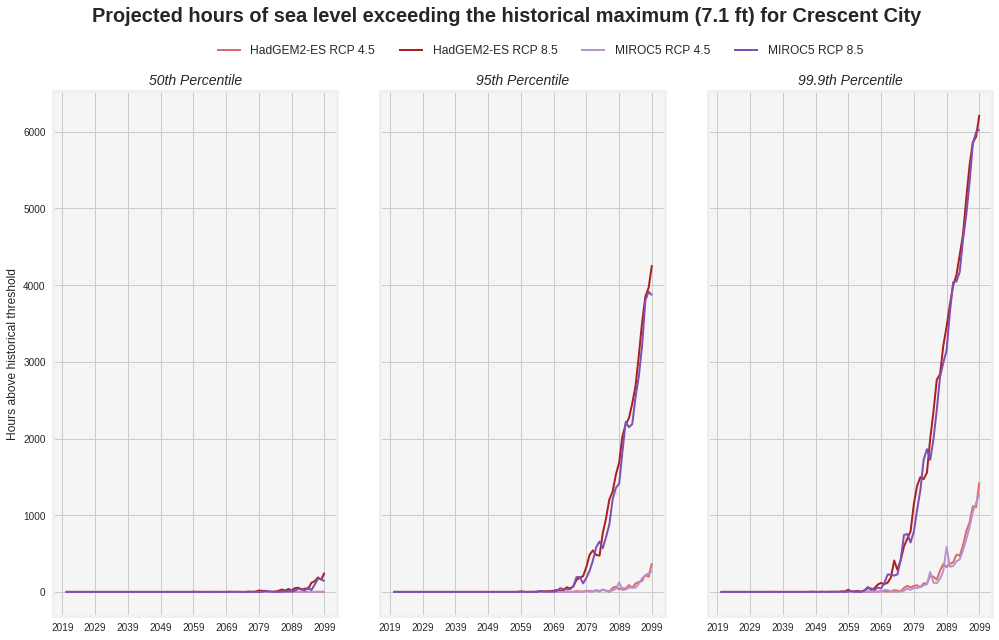

In [296]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='all', figsize=(15, 9))

l1 = ax1.plot(total_data_50)
ax2.plot(total_data_95)
ax3.plot(total_data_99)

ax1.set_title('50th Percentile', fontstyle='italic', fontsize=14)
ax1.set_ylabel('Hours above historical threshold', fontsize=12)
ax2.set_title('95th Percentile', fontstyle='italic', fontsize=14)
ax3.set_title('99.9th Percentile', fontstyle='italic', fontsize=14)


legend = f.legend(l1, (['HadGEM2-ES RCP 4.5', 'HadGEM2-ES RCP 8.5', 'MIROC5 RCP 4.5', 'MIROC5 RCP 8.5']),
                  loc='upper center', 
                  ncol=4,
                  bbox_to_anchor=[0.5, 0.935],
                  fontsize=12
                 )

# Space plots a bit
plt.subplots_adjust(wspace=0.15)

f.suptitle('Projected hours of sea level exceeding the historical maximum (7.1 ft) for Crescent City', y=1.01, fontsize=20, fontweight='bold')
f.savefig('image/hours_above_threshold.png', bbox_inches='tight', facecolor='w')

## Ocean Atmosphere Component

In [297]:
sql_query = '''SELECT source,
                      strftime("%Y", event) Year,
                      avg(ocean_atmos) OceanAtmos
                      FROM slr
                      WHERE
                      source IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
                      AND event >= "2000-01-01"
                      GROUP BY source, Year;'''

ocean_atmos = pd.read_sql_query(sql_query, conn)
ocean_atmos

,source,Year,OceanAtmos
0,1,2000,-1.691491
1,1,2001,-1.669459
2,1,2002,3.178816
3,1,2003,-5.762706
4,1,2004,-7.468302
5,1,2005,-2.828459
6,1,2006,-1.932825
7,1,2007,2.735691
8,1,2008,-1.034827
9,1,2009,4.290459


In [298]:
ocean_atmos_data = ocean_atmos.join(sf_sources.set_index('id'), on='source')
ocean_atmos_data = ocean_atmos_data.drop(['station', 'name', 'source'], axis=1)
ocean_atmos_data = ocean_atmos_data.set_index('Year')
ocean_atmos_data.index = pd.to_datetime(ocean_atmos_data.index)
ocean_atmos_data['OceanAtmos'] = pd.to_numeric(ocean_atmos_data['OceanAtmos'])
ocean_atmos_data

,OceanAtmos,series
Year,,
2000-01-01,-1.691491,HadGEM2-ES RCP45 50th Percentile
2001-01-01,-1.669459,HadGEM2-ES RCP45 50th Percentile
2002-01-01,3.178816,HadGEM2-ES RCP45 50th Percentile
2003-01-01,-5.762706,HadGEM2-ES RCP45 50th Percentile
2004-01-01,-7.468302,HadGEM2-ES RCP45 50th Percentile
2005-01-01,-2.828459,HadGEM2-ES RCP45 50th Percentile
2006-01-01,-1.932825,HadGEM2-ES RCP45 50th Percentile
2007-01-01,2.735691,HadGEM2-ES RCP45 50th Percentile
2008-01-01,-1.034827,HadGEM2-ES RCP45 50th Percentile


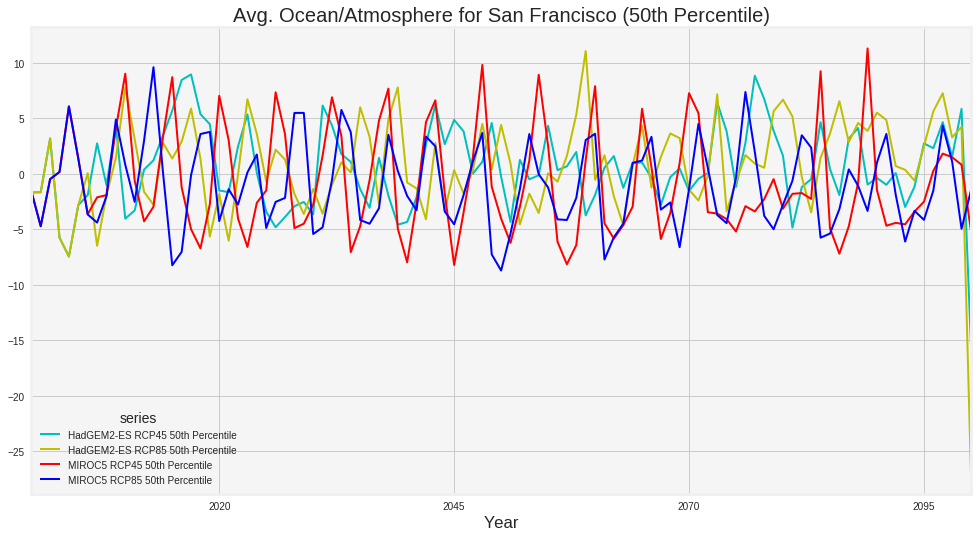

In [299]:
ocean_atmos_data_50 = ocean_atmos_data.loc[ocean_atmos_data['series'].str.contains('50th Percentile')]
ocean_atmos_data_50 = ocean_atmos_data_50.pivot(columns='series', values='OceanAtmos')
ocean_atmos_data_50.plot(color = s.values, figsize=(15,8), title='Avg. Ocean/Atmosphere for San Francisco (50th Percentile)')

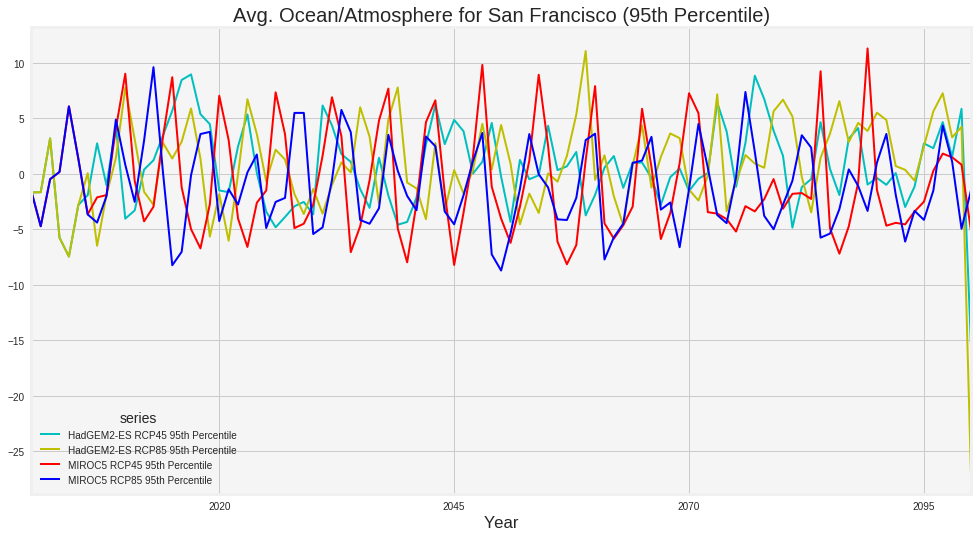

In [300]:
ocean_atmos_data_95 = ocean_atmos_data.loc[ocean_atmos_data['series'].str.contains('95th Percentile')]
ocean_atmos_data_95 = ocean_atmos_data_95.pivot(columns='series', values='OceanAtmos')
ocean_atmos_data_95.plot(color = s.values, figsize=(15,8), title='Avg. Ocean/Atmosphere for San Francisco (95th Percentile)')

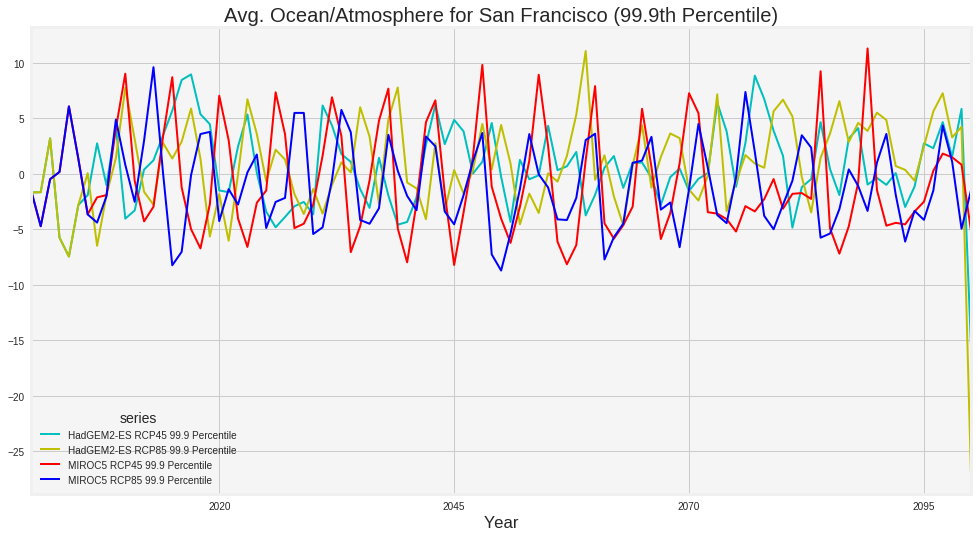

In [301]:
ocean_atmos_data_99 = ocean_atmos_data.loc[ocean_atmos_data['series'].str.contains('99.9 Percentile')]
ocean_atmos_data_99 = ocean_atmos_data_99.pivot(columns='series', values='OceanAtmos')
ocean_atmos_data_99.plot(color = s.values, figsize=(15,8), title='Avg. Ocean/Atmosphere for San Francisco (99.9th Percentile)')

## Secular Sea Level Rise

Show secular sea level rise (the sea level rise due to climate change/tectonics) for the different models over time in one set of graphs for each stations and for the 3 different  percentiles. This would just be 3 different lines, one for each  percentile, though there is RCP 4.5 and RCP 8.5.

In [302]:
sql_query = '''SELECT source,
                      strftime("%Y", event) Year,
                      avg(secular) Secular
                      FROM slr
                      WHERE
                      source IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
                      AND event >= "2000-01-01"
                      GROUP BY source, Year;'''
secular = pd.read_sql_query(sql_query, conn)
secular

,source,Year,Secular
0,1,2000,-0.740911
1,1,2001,-0.689777
2,1,2002,-0.644330
3,1,2003,-0.607095
4,1,2004,-0.578579
5,1,2005,-0.556620
6,1,2006,-0.543994
7,1,2007,-0.540000
8,1,2008,-0.540891
9,1,2009,-0.553771


In [303]:
secular_data = secular.join(sf_sources.set_index('id'), on='source')
secular_data = secular_data.drop(['station', 'name', 'source'], axis=1)
secular_data = secular_data.set_index('Year')
secular_data.index = pd.to_datetime(secular_data.index)
secular_data['Secular'] = pd.to_numeric(secular_data['Secular']) * 0.0328084
secular_data

,Secular,series
Year,,
2000-01-01,-0.024308,HadGEM2-ES RCP45 50th Percentile
2001-01-01,-0.022630,HadGEM2-ES RCP45 50th Percentile
2002-01-01,-0.021139,HadGEM2-ES RCP45 50th Percentile
2003-01-01,-0.019918,HadGEM2-ES RCP45 50th Percentile
2004-01-01,-0.018982,HadGEM2-ES RCP45 50th Percentile
2005-01-01,-0.018262,HadGEM2-ES RCP45 50th Percentile
2006-01-01,-0.017848,HadGEM2-ES RCP45 50th Percentile
2007-01-01,-0.017717,HadGEM2-ES RCP45 50th Percentile
2008-01-01,-0.017746,HadGEM2-ES RCP45 50th Percentile


In [304]:
secular_data_50 = secular_data.loc[secular_data['series'].str.contains('50th Percentile')]
secular_data_50 = secular_data_50.pivot(columns='series', values='Secular')

In [305]:
secular_data_95 = secular_data.loc[secular_data['series'].str.contains('95th Percentile')]
secular_data_95 = secular_data_95.pivot(columns='series', values='Secular')

In [306]:
secular_data_99 = secular_data.loc[secular_data['series'].str.contains('99.9 Percentile')]
secular_data_99 = secular_data_99.pivot(columns='series', values='Secular')
#secular_data_99.plot(color = s.values, figsize=(15,8), title='Avg. Secular SLR for San Francisco (99.9th Percentile)')

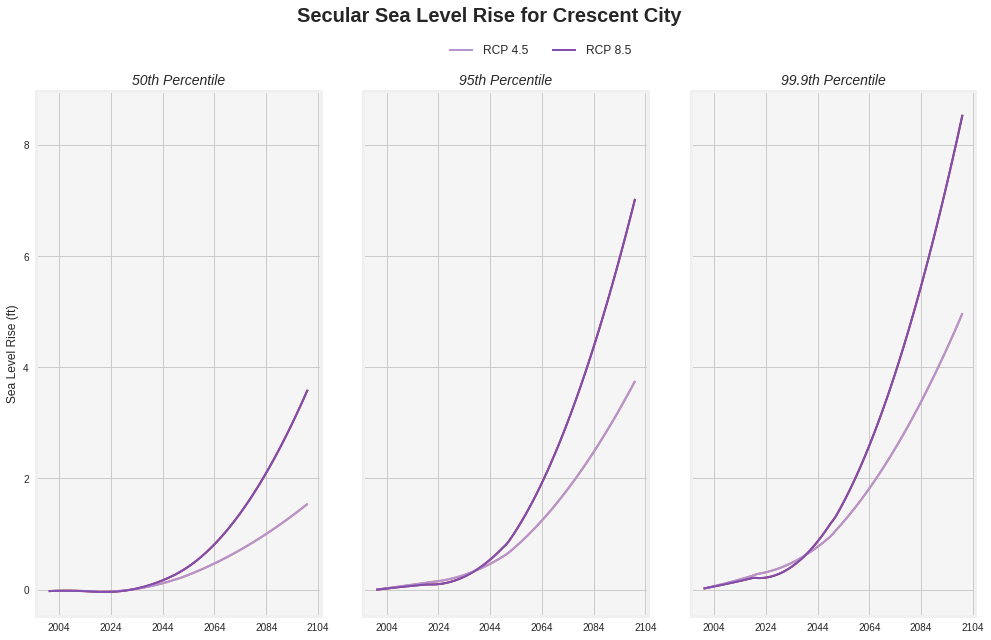

In [307]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='all', figsize=(15, 9))

l1 = ax1.plot(secular_data_50)
ax2.plot(secular_data_95)
ax3.plot(secular_data_99)

ax1.set_title('50th Percentile', fontstyle='italic', fontsize=14)
ax1.set_ylabel('Sea Level Rise (ft)', fontsize=12)
ax2.set_title('95th Percentile', fontstyle='italic', fontsize=14)
ax3.set_title('99.9th Percentile', fontstyle='italic', fontsize=14)


legend = f.legend((l1[2], l1[3]), (['RCP 4.5', 'RCP 8.5']),
                  loc='upper center', 
                  ncol=2,
                  bbox_to_anchor=[0.5, 0.935],
                  fontsize=12
                 )

# Space plots a bit
plt.subplots_adjust(wspace=0.15)

f.suptitle('Secular Sea Level Rise for Crescent City', y=1.01, fontsize=20, fontweight='bold')
f.savefig('image/secular_slr.png', bbox_inches='tight', facecolor='w')